# Buyer Activity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

### Comparing Stock 2021 and Wholesale Buyer Applications

In [2]:
stock=pd.read_csv('2021stock.csv')
ws_buy=pd.read_csv('ws_buy.csv')

In [3]:
ws_buy['company name']=ws_buy['company name'].str.lower()
ws_buy=ws_buy.rename(columns={'company name': 'buyer'})

In [4]:
stock['buyer']=stock['buyer'].str.lower()

In [5]:
buy_list=list(stock['buyer'].unique())

In [6]:
stock['submitted_on']=pd.to_datetime(stock['submitted_on'])
stock['date']=stock['submitted_on'].dt.date
stock['day_of_week']=stock['submitted_on'].dt.dayofweek

In [7]:
stock=stock.sort_values(by='date', ascending=False)

In [8]:
# stock.to_csv('stock_ytd.csv')

#### Stock Buyers in the Past 30, 60, and 90 Days

In [9]:
startA='04-09-2021'
end='05-09-2021'

thirty_mask = (stock['submitted_on'] > startA) & (stock['submitted_on'] <= end)
thirty=stock.loc[thirty_mask]

th_list=thirty['buyer'].unique()

startB='03-09-2021'

sixty_mask = (stock['submitted_on'] > startB) & (stock['submitted_on'] <= end)
sixty=stock.loc[sixty_mask]

six_list=sixty['buyer'].unique()

startC='02-09-2021'

ninety_mask = (stock['submitted_on'] > startC) & (stock['submitted_on'] <= end)
ninety=stock.loc[ninety_mask]

nine_list=ninety['buyer'].unique()

print('buyers in the past 30 days: {}\n'.format(th_list))
print('buyers in the past 60 days: {}\n'.format(six_list))
print('buyers in the past 90 days: {}\n'.format(nine_list))

buyers in the past 30 days: ['jacob james' 'everything but the house' 'gulf coast lavish resale'
 'lucky finds boutique' 'wgaca' 'the look consignment boutique'
 'lux love louis' 'double take va' 'the realreal' 'the luxury bee'
 'hk estate jewels' 'bag borrow steal' 'smitten luxury' 'curateur'
 'rue gilt' 'season 2 consign' "sotheby's" 'shopbop' 'the style lister'
 'harley 2019' 'yolo luxury consignment' 'roundabouts consignments sc'
 'lp-mktg' 'alexis suitcase' 'eclectic' 'back on the rack gulfport'
 'my next fit' 'radiant rose boutique' 'chic girl'
 'positively radiant boutik' "plato's closet sterling" 'one classy shop'
 'wardrobe rescue' 'eileenaltieri' "n'used fashions" "sweet jane's design"
 'the lavish loft' 'agents in style' 'closet exchange ga' 'sydney.s'
 'nesly.m' 'repeat street' 'urban renewal consign' 'reventehcb'
 'dame fashion' 'palm beach princess' 'worth the wait va' 'tara tucci'
 'noir blanc boutique llc' 'vickie’s closet' 'atelier curated'
 'elizabeth beauty' 'sacdelu

In [10]:
# thirty.to_csv('stock_thirty.csv')

#### Auction Bidders in the Past 30, 60, 90 days

In [11]:
bid=pd.read_csv('2021placedbids.csv')

In [12]:
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])
bid['buyer']=bid['buyer'].str.lower()
bid['day_of_week']=bid['bid_placed_on'].dt.dayofweek
bid['hour']=bid['bid_placed_on'].dt.hour

dow_map={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
bid['day']=bid['day_of_week'].map(dow_map)
bid['date']=bid['bid_placed_on'].dt.date

bid=bid.sort_values(by='bid_placed_on')

In [13]:
bid_startA='04-09-2021'
bid_end='05-11-2021'

bid_thirty_mask = (bid['bid_placed_on'] > bid_startA) & (bid['bid_placed_on'] <= bid_end)
bid_thirty=bid.loc[bid_thirty_mask]

b_th_list=bid_thirty['buyer'].unique()

bid_startB='03-11-2021'

bid_sixty_mask = (bid['bid_placed_on'] > bid_startB) & (bid['bid_placed_on'] <= bid_end)
bid_sixty=bid.loc[bid_sixty_mask]

b_six_list=bid_sixty['buyer'].unique()

bid_startC='02-11-2021'

bid_ninety_mask = (bid['bid_placed_on'] > bid_startC) & (bid['bid_placed_on'] <= bid_end)
bid_ninety=bid.loc[bid_ninety_mask]

b_nine_list=bid_ninety['buyer'].unique()

print('bidders in the past 30 days: {}\n'.format(b_th_list))
print('bidders in the past 60 days: {}\n'.format(b_six_list))
print('bidders in the past 90 days: {}\n'.format(b_nine_list))

bidders in the past 30 days: ["karen's rocks and rags" 'e designer' 'yolo luxury consignment'
 'maltise consignment' 'carriesherron' 'viva snobswap' 'ds darling deals'
 'on again consignment' 'tara tucci' 'bag borrow steal'
 'mari scott vintage' 'radiant rose boutique' 'ella j boutique' 'artex'
 'volver' 'my next fit' 'homations liquidations' 'mustloveshoes'
 'gulf coast lavish resale' 'adore the couture' 'shopbop'
 'noir blanc boutique llc' 'rue gilt' 'the digital cantina' 'harley 2019'
 'double take va' 'treasures by tay' 'style encore maple grove'
 'injury collection' 'bagriculture' 'plain jane consignments'
 'season 2 consign' 'junk jeans' 'thrill of the find' 'ascresale'
 'chic girl' 'kathy & company boutique' 'braswell&son' 'one classy shop'
 'smitten luxury' 'palm beach princess' 'back on the rack gulfport'
 'back on the rack fairhope' 'raspberry beret' 'reventehcb' 'nesly.m'
 'boutiquepatina' 'lux love louis' 'sacdelux'
 'pemberley designer consignment' 'soohee' 'chic consignme

In [14]:
# bid.to_csv('bid_ytd.csv')

In [15]:
def cross_check(l1, l2):
    """
    Returns a new list keeping only unique elements from l1 and l2.
    
    Parameter l1: first list to check
    Precondition: l1 is a non-empty list
    
    Parameter l2: second list to check
    Precondition: l2 is a non-empty list
    """
    new=[]
    for el in l1:
        new.append(el)
    for el in l2:
        if el not in new:
            new.append(el)
    return new

thirty_all=cross_check(th_list, b_th_list)
sixty_all=cross_check(six_list, b_six_list)
ninety_all=cross_check(nine_list, b_nine_list)

print('all buyers in the past 30 days: {}\n'.format(thirty_all))
print('all buyers in the past 60 days: {}\n'.format(sixty_all))
print('all buyers in the past 90 days: {}\n'.format(ninety_all))

all buyers in the past 30 days: ['jacob james', 'everything but the house', 'gulf coast lavish resale', 'lucky finds boutique', 'wgaca', 'the look consignment boutique', 'lux love louis', 'double take va', 'the realreal', 'the luxury bee', 'hk estate jewels', 'bag borrow steal', 'smitten luxury', 'curateur', 'rue gilt', 'season 2 consign', "sotheby's", 'shopbop', 'the style lister', 'harley 2019', 'yolo luxury consignment', 'roundabouts consignments sc', 'lp-mktg', 'alexis suitcase', 'eclectic', 'back on the rack gulfport', 'my next fit', 'radiant rose boutique', 'chic girl', 'positively radiant boutik', "plato's closet sterling", 'one classy shop', 'wardrobe rescue', 'eileenaltieri', "n'used fashions", "sweet jane's design", 'the lavish loft', 'agents in style', 'closet exchange ga', 'sydney.s', 'nesly.m', 'repeat street', 'urban renewal consign', 'reventehcb', 'dame fashion', 'palm beach princess', 'worth the wait va', 'tara tucci', 'noir blanc boutique llc', 'vickie’s closet', 'atel

In [16]:
stage=pd.read_csv('buyer_stage.csv')

In [17]:
stage.columns=stage.columns.str.lower()
stage['email']=stage['email'].str.lower()
stage.head()

,contact id,first name,last name,associated company id,prospect stage,email,contact owner,phone number,last activity date,lead status,create date,country/region,associated company id.1,associated company,additional email addresses
0,182001,Matthew,NaN,NaN,Stage 1 : 10% Unqualified Prospect,matthewbarison.4512@outlook.com,NaN,NaN,6/1/21 10:30,NaN,6/1/21 10:30,NaN,NaN,NaN,NaN
1,181951,NaN,NaN,6.106872e+09,Stage 1 : 10% Unqualified Prospect,wwalls@expressonelogistics.com,Steven Kim,NaN,5/24/21 15:51,NaN,5/24/21 15:44,NaN,6.106872e+09,Expressonelogistics,NaN
2,181901,NaN,NaN,4.521458e+09,Stage 1 : 10% Unqualified Prospect,lwilliams@ruegiltgroupe.com,Jeannette Oh,NaN,5/21/21 6:02,NaN,5/21/21 6:02,NaN,4.521458e+09,Rue Gilt Groupe LP,NaN
3,181851,NaN,NaN,4.521458e+09,Stage 1 : 10% Unqualified Prospect,salane@ruegiltgroupe.com,Jeannette Oh,NaN,5/21/21 6:02,NaN,5/21/21 6:02,NaN,4.521458e+09,Rue Gilt Groupe LP,NaN
4,181801,NaN,NaN,NaN,Stage 1 : 10% Unqualified Prospect,dhshawwlm@yahoo.com,Jeannette Oh,NaN,5/21/21 5:31,NaN,5/21/21 5:31,NaN,NaN,NaN,NaN


In [18]:
dummies=pd.get_dummies(stage['prospect stage'])

dummies.head()

,Stage 0 : 0% No longer a prospect,Stage 1 : 10% Unqualified Prospect,Stage 2 : 20% Identified Opportunity,Stage 3 : 40% Qualified Opportunity,Stage 4 : 60% Negotiation in Progress,Stage 5 : 80% Attempted a Purchase,Stage 6 : 100% Transacted at Least Once,Stage 7 : Inactive
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [19]:
stage_map={}
step=0
for col in dummies.columns:
    stage_map[col]=step
    step+=1

stage['stage']=stage['prospect stage'].map(stage_map)

In [20]:
# stage.to_csv('new_stage.csv')

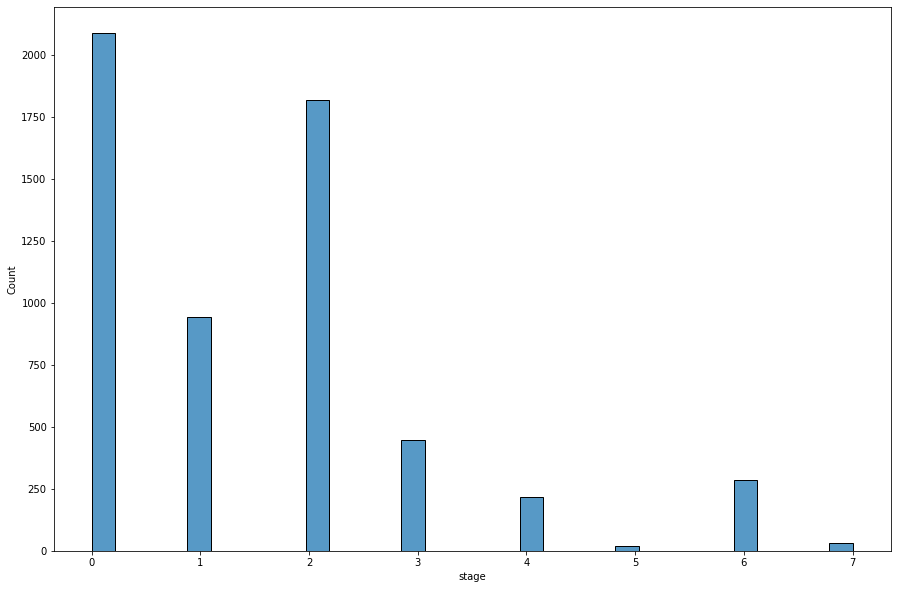

In [21]:
plt.figure(figsize=(15,10))
sns.histplot(x='stage', data=stage)
plt.show()

In [22]:
ws_buy['email']=ws_buy['email'].str.lower()

buy_new=pd.merge(ws_buy[['email', 'referral','medium']], stage, left_on='email', right_on='email')
buy_new.head()

,email,referral,medium,contact id,first name,last name,associated company id,prospect stage,contact owner,phone number,last activity date,lead status,create date,country/region,associated company id.1,associated company,additional email addresses,stage
0,lsalvador513@gmail.com,instagram,Social,26113,Lucia,Salvador,NaN,Stage 0 : 0% No longer a prospect,Steven Kim,+1 510734865000,NaN,NaN,2/13/20 10:28,NaN,NaN,NaN,NaN,0.0
1,shernandez1224@gmail.com,search engine,Organic Search,154451,Sonia,Hernandez,5.807060e+09,Stage 1 : 10% Unqualified Prospect,Lydia Arshadi (Deactivated User),6475195205,NaN,NaN,3/24/21 10:21,Canada,5.807060e+09,MalalaLand Powered by Etsy,NaN,1.0
2,shernandez1224@gmail.com,search engine,Organic Search,154451,Sonia,Hernandez,5.807060e+09,Stage 1 : 10% Unqualified Prospect,Lydia Arshadi (Deactivated User),6475195205,NaN,NaN,3/24/21 10:21,Canada,5.807060e+09,MalalaLand Powered by Etsy,NaN,1.0
3,lisay.perez719@gmail.com,search engine,Organic Search,172201,Lisa,Perez,NaN,Stage 1 : 10% Unqualified Prospect,Lydia Arshadi (Deactivated User),7193579790,NaN,NaN,4/5/21 10:14,United States,NaN,NaN,NaN,1.0
4,lisay.perez719@gmail.com,search engine,Organic Search,172201,Lisa,Perez,NaN,Stage 1 : 10% Unqualified Prospect,Lydia Arshadi (Deactivated User),7193579790,NaN,NaN,4/5/21 10:14,United States,NaN,NaN,NaN,1.0


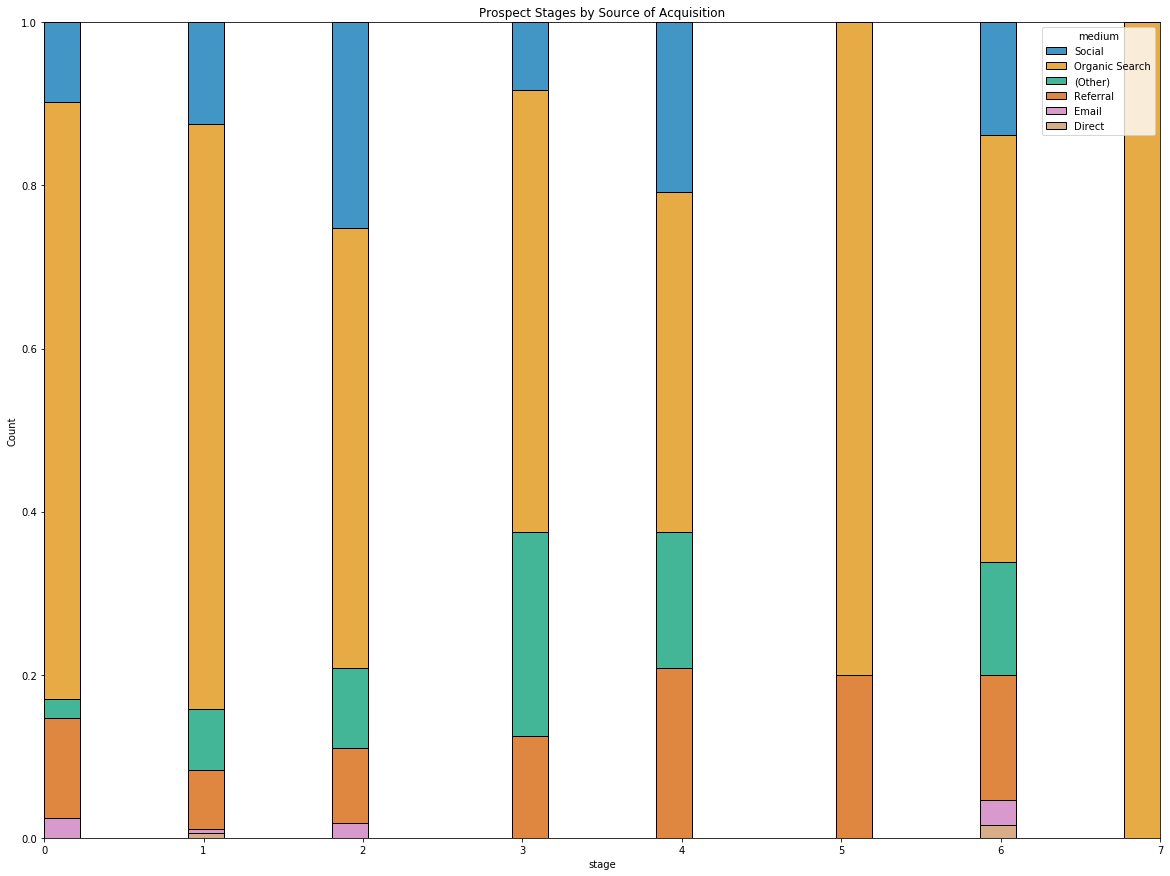

In [23]:
sns.set_palette('colorblind')
plt.figure(figsize=(20,15))
sns.histplot(x='stage', stat='count', data=buy_new, hue='medium', multiple='fill')
plt.title('Prospect Stages by Source of Acquisition')
plt.show()

From this chart, it looks like organic search remains the most popular source to applications, but interestingly, buyers who found LePrix through organic search take up most of the unqualified prospects. However, many have made transactions at least once.

In [24]:
stage_count=pd.DataFrame({'count':buy_new.groupby(['medium','stage']).size()}).reset_index()

stage_count

,medium,stage,count
0,(Other),0.0,1
1,(Other),1.0,27
2,(Other),2.0,16
3,(Other),3.0,6
4,(Other),4.0,4
5,(Other),6.0,9
6,Direct,1.0,2
7,Direct,6.0,1
8,Email,0.0,1
9,Email,1.0,2


In [25]:
for med in ['(Other)', 'Social', 'Organic Search', 'Referral', 'Email', 'Direct']:
    conv=(buy_new[(buy_new['medium']==med)]
         .groupby(['stage'])
         .count()
         .apply(lambda x: 100*x/x.sum())['medium'][6.0])
    print('the conversion rate for '+med+': {:.2f}%'.format(conv))

the conversion rate for (Other): 14.29%
the conversion rate for Social: 8.49%
the conversion rate for Organic Search: 7.73%
the conversion rate for Referral: 15.38%
the conversion rate for Email: 25.00%
the conversion rate for Direct: 33.33%


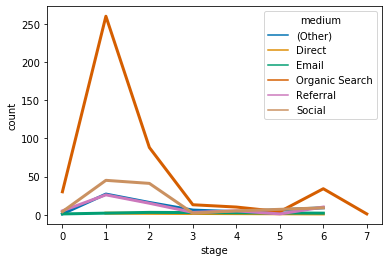

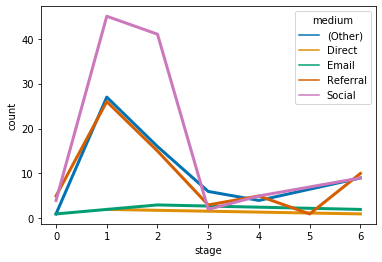

In [26]:
sns.lineplot(x='stage', y='count', data=stage_count, hue='medium', linewidth=3)
plt.show()

sns.lineplot(x='stage', y='count', data=stage_count.loc[stage_count['medium']!='Organic Search'],
            hue='medium', linewidth=3)
plt.show()

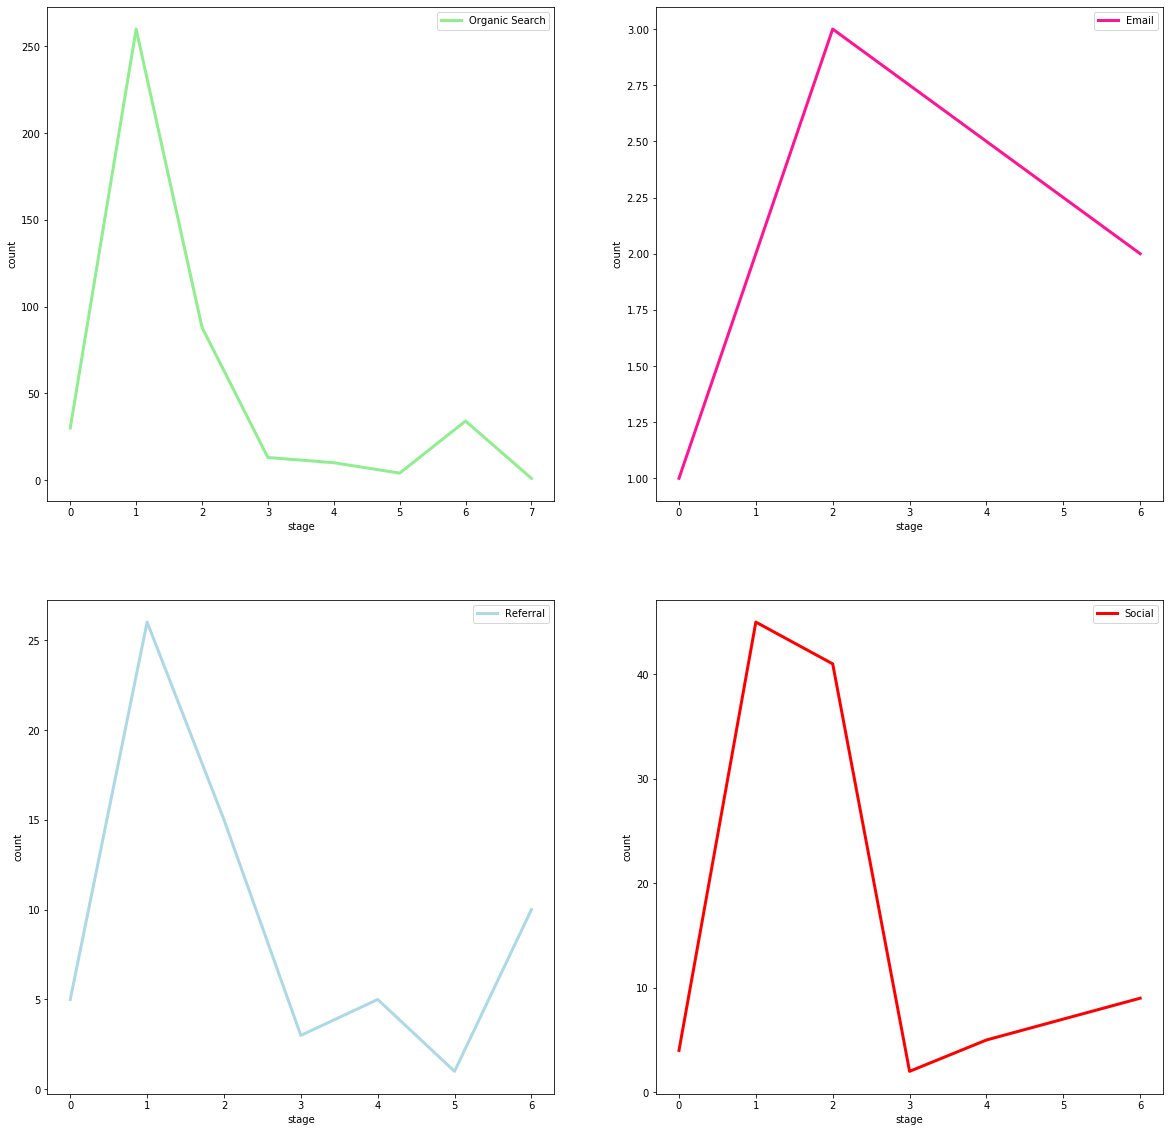

In [27]:
fig,axes=plt.subplots(2, 2, figsize=(20,20))

sns.lineplot(x='stage', y='count', data=stage_count.loc[stage_count['medium']=='Organic Search'],
            label='Organic Search', linewidth=3, ax=axes[0,0], color='lightgreen')

sns.lineplot(x='stage', y='count', data=stage_count.loc[stage_count['medium']=='Email'],
            label='Email', linewidth=3, ax=axes[0,1], color='deeppink')

sns.lineplot(x='stage', y='count', data=stage_count.loc[stage_count['medium']==('Referral')],
            label='Referral', linewidth=3, ax=axes[1,0], color='lightblue')

sns.lineplot(x='stage', y='count', data=stage_count.loc[stage_count['medium']=='Social'],
            label='Social', linewidth=3, ax=axes[1,1], color='red')

plt.show()

### Buyer Segmentation Exploratory Analysis

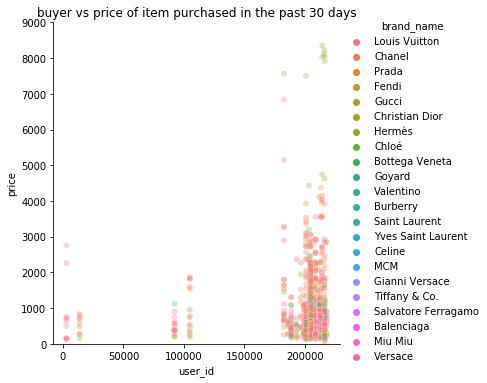

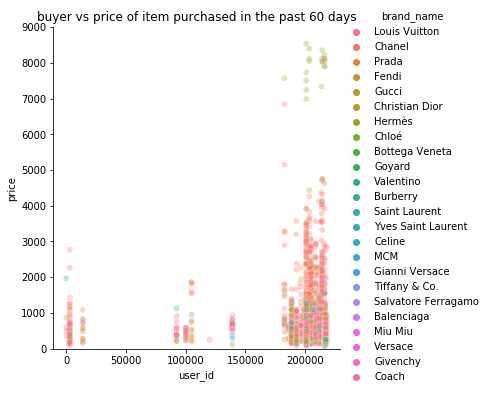

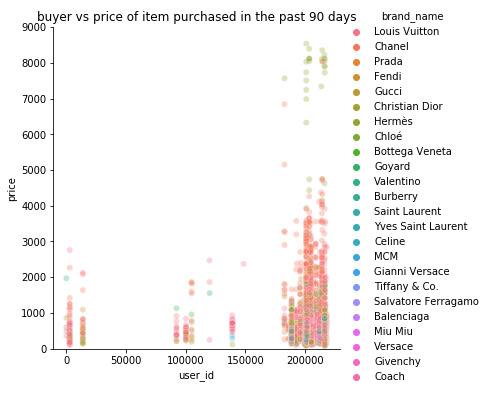

In [28]:
#30
sns.relplot(x='user_id', y='price', data=thirty, hue='brand_name', alpha=0.3)
plt.ylim(bottom=0, top=9000)
plt.title('buyer vs price of item purchased in the past 30 days')
plt.show()

#60
sns.relplot(x='user_id', y='price', data=sixty, hue='brand_name', alpha=0.3)
plt.ylim(bottom=0, top=9000)
plt.title('buyer vs price of item purchased in the past 60 days')
plt.show()

#90
sns.relplot(x='user_id', y='price', data=ninety, hue='brand_name', alpha=0.3)
plt.ylim(bottom=0, top=9000)
plt.title('buyer vs price of item purchased in the past 90 days')
plt.show()

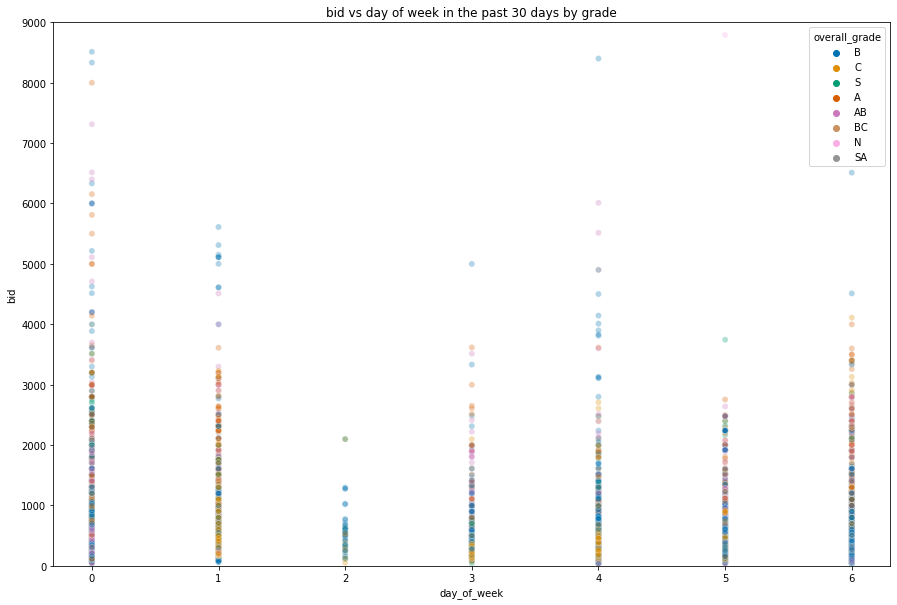

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='day_of_week', y='bid', data=bid_thirty, hue='overall_grade', alpha=0.3)
plt.ylim(bottom=0, top=9000)
plt.title('bid vs day of week in the past 30 days by grade')
plt.show()

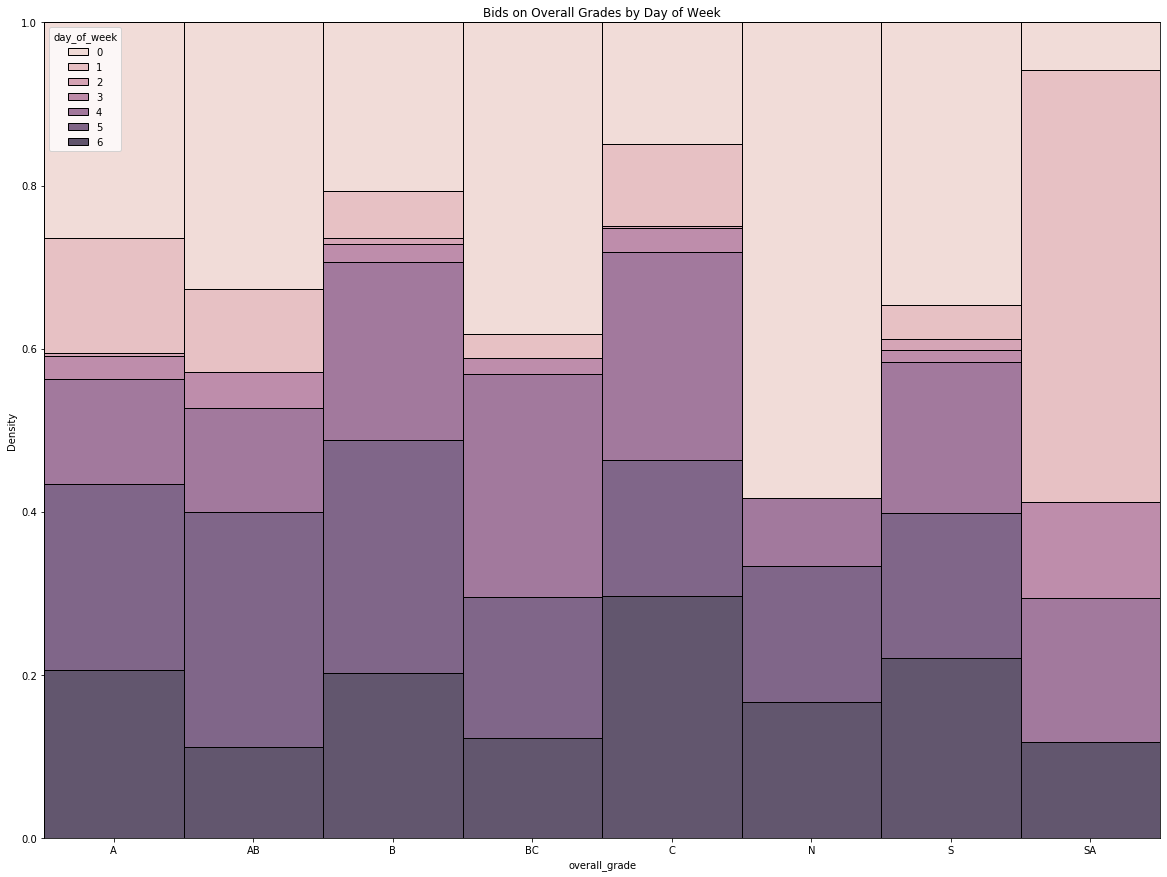

In [30]:
plt.figure(figsize=(20,15))
sns.histplot(x='overall_grade', data=bid_thirty.sort_values(by='overall_grade'), stat='density', 
             multiple='fill', hue='day_of_week')
plt.title('Bids on Overall Grades by Day of Week')
plt.show()

We see here that on Mondays, most buyers are purchasing items with grade N. On Sundays, more buyers are willing to purchase grade C items compared to other days of the week. 

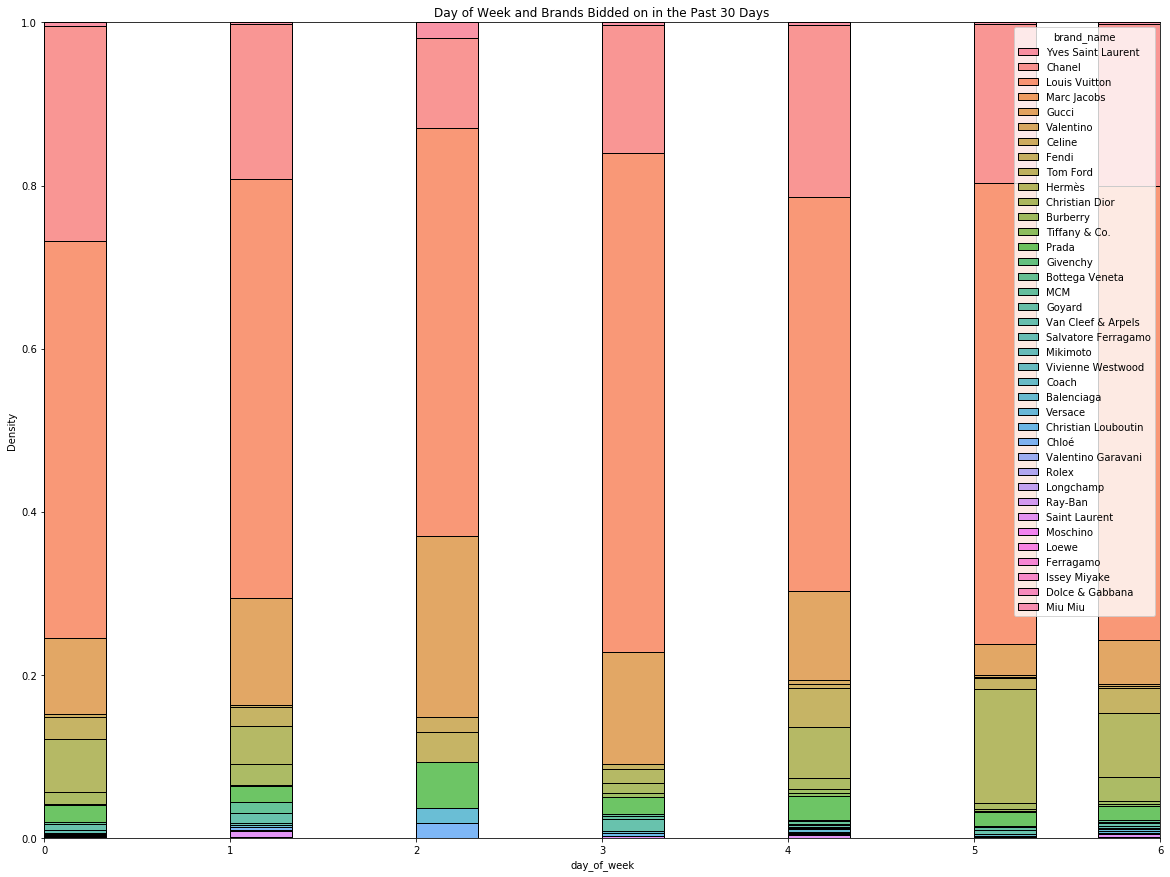

In [31]:
plt.figure(figsize=(20,15))
sns.histplot(x='day_of_week', data=bid_thirty, stat='density', 
             multiple='fill', hue='brand_name')
plt.title('Day of Week and Brands Bidded on in the Past 30 Days')
plt.show()

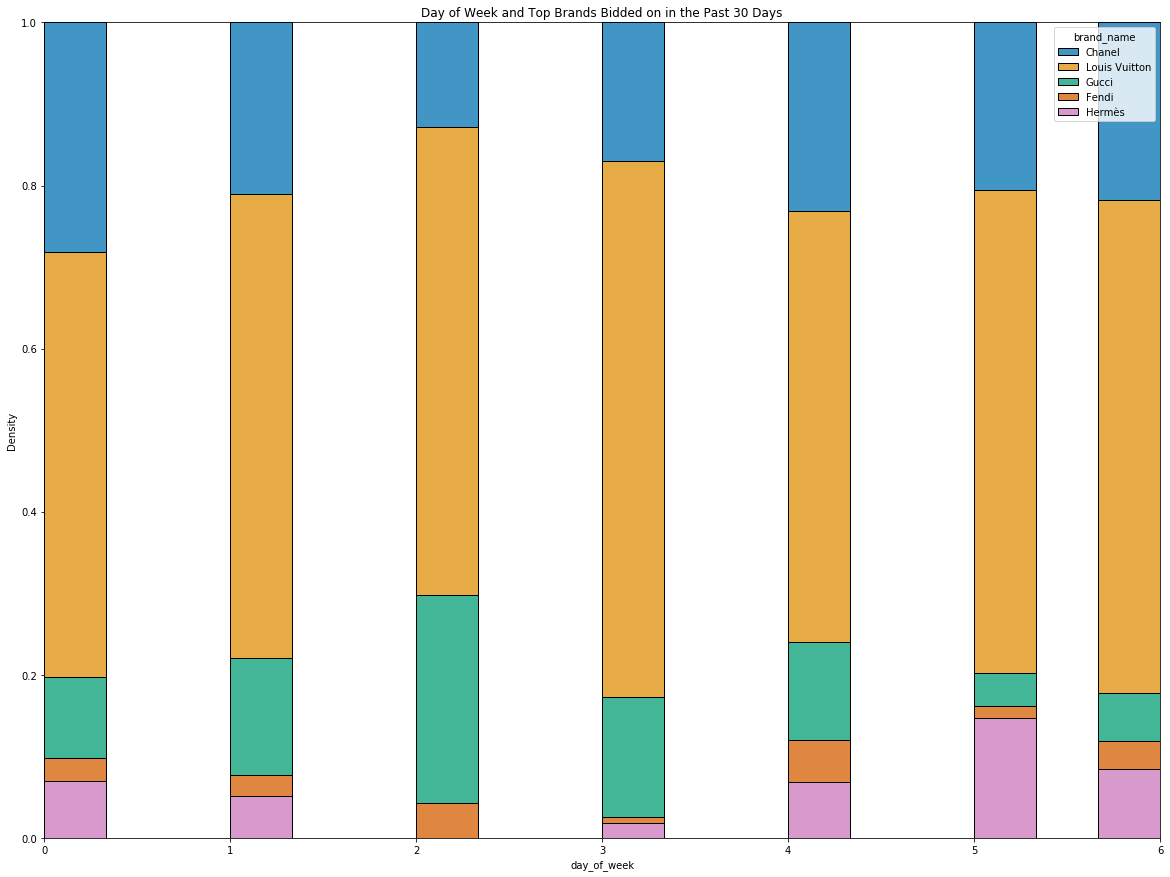

In [32]:
top=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès']
top_thirty=bid_thirty.loc[bid_thirty['brand_name'].isin(top)]

plt.figure(figsize=(20,15))
sns.histplot(x='day_of_week', data=top_thirty, stat='density', 
             multiple='fill', hue='brand_name')
plt.title('Day of Week and Top Brands Bidded on in the Past 30 Days')
plt.show()

We see a pretty consistent portion of auction bids each day on LV, with the largest fraction of bids on Saturday and Thursday. Chanel's largest fraction of bids appears to occur on Mondays, Gucci's on Wednesday's, and Fendi on Friday's. This could present an opportunity to market different brands on different days. Below, we will compare bidding patterns with purchase patterns.

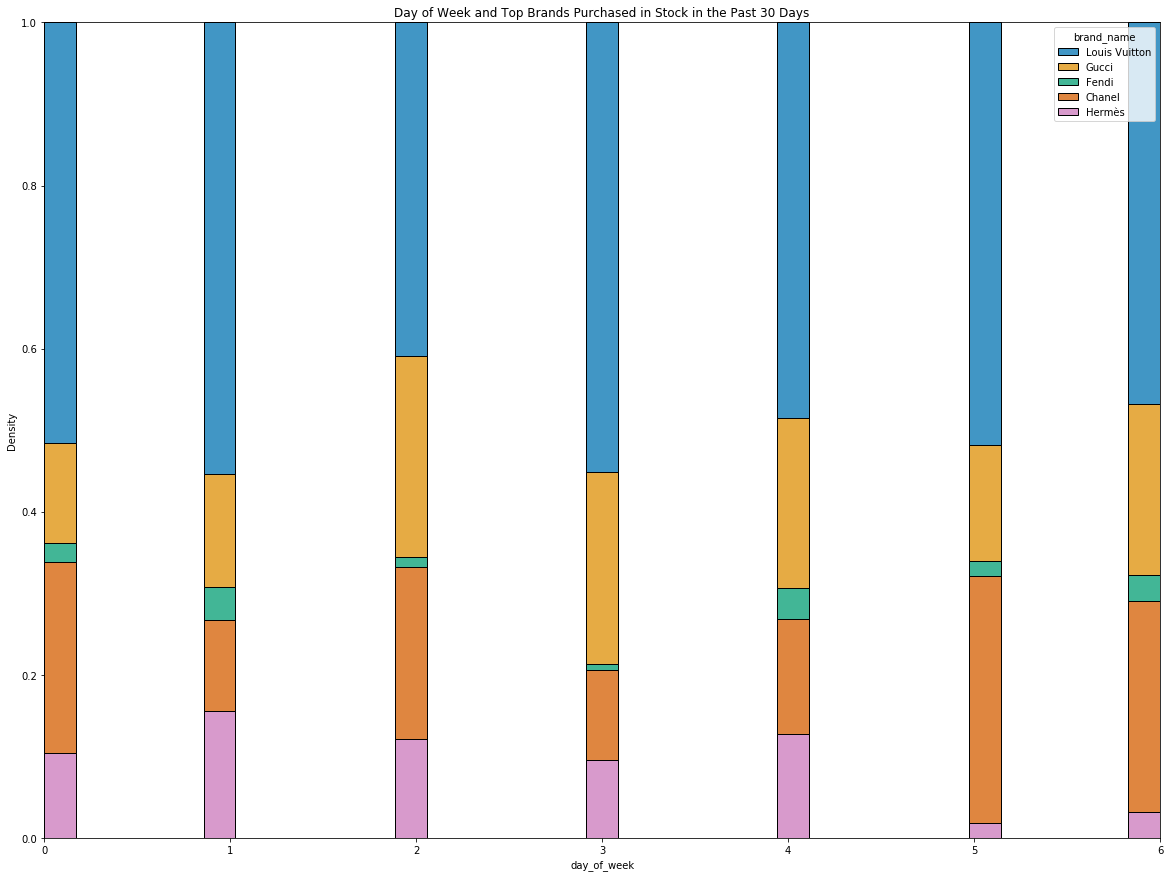

In [33]:
top=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès']
buy_top_thirty=thirty.loc[thirty['brand_name'].isin(top)]

plt.figure(figsize=(20,15))
sns.histplot(x='day_of_week', data=buy_top_thirty, stat='density', 
             multiple='fill', hue='brand_name', hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'])
plt.title('Day of Week and Top Brands Purchased in Stock in the Past 30 Days')
plt.show()

Similar to the bidding data, buyers who are purchasing the top brands favor LV, except here we see that LV takes a larger share of Tuesday's sales than Thursday's and Saturday's. Gucci's largest volume is still on Tuesday's, so it might be a good day for marketing. Chanel similarly has its highest volume on Monday's, Saturday's, and Sunday's, and Fendi is a small portion of purchases.

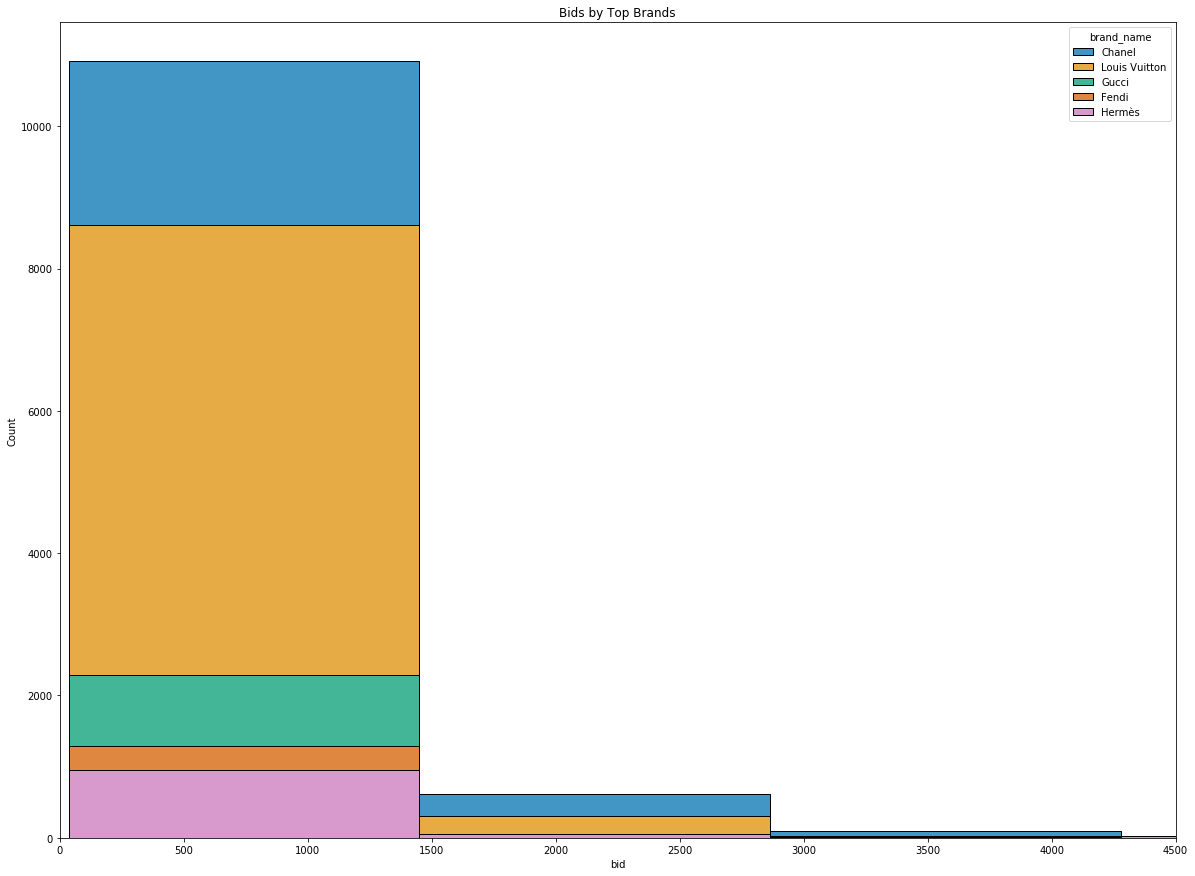

In [34]:
plt.figure(figsize=(20,15))
sns.histplot(x='bid', data=top_thirty, bins=12, hue='brand_name', multiple='stack')
plt.xlim(left=0, right=4500)
plt.title('Bids by Top Brands')
plt.show()

In [35]:
top_thirty.groupby('buyer')['bid'].count().sort_values(ascending=False)

buyer
bagriculture                      3381
rue gilt                          2531
tara tucci                        1350
karen's rocks and rags             493
style encore maple grove           433
                                  ... 
kim's lux goods                      1
repeat street                        1
closet trading co - plantation       1
noir blanc boutique llc              1
lp-mktg                              1
Name: bid, Length: 93, dtype: int64

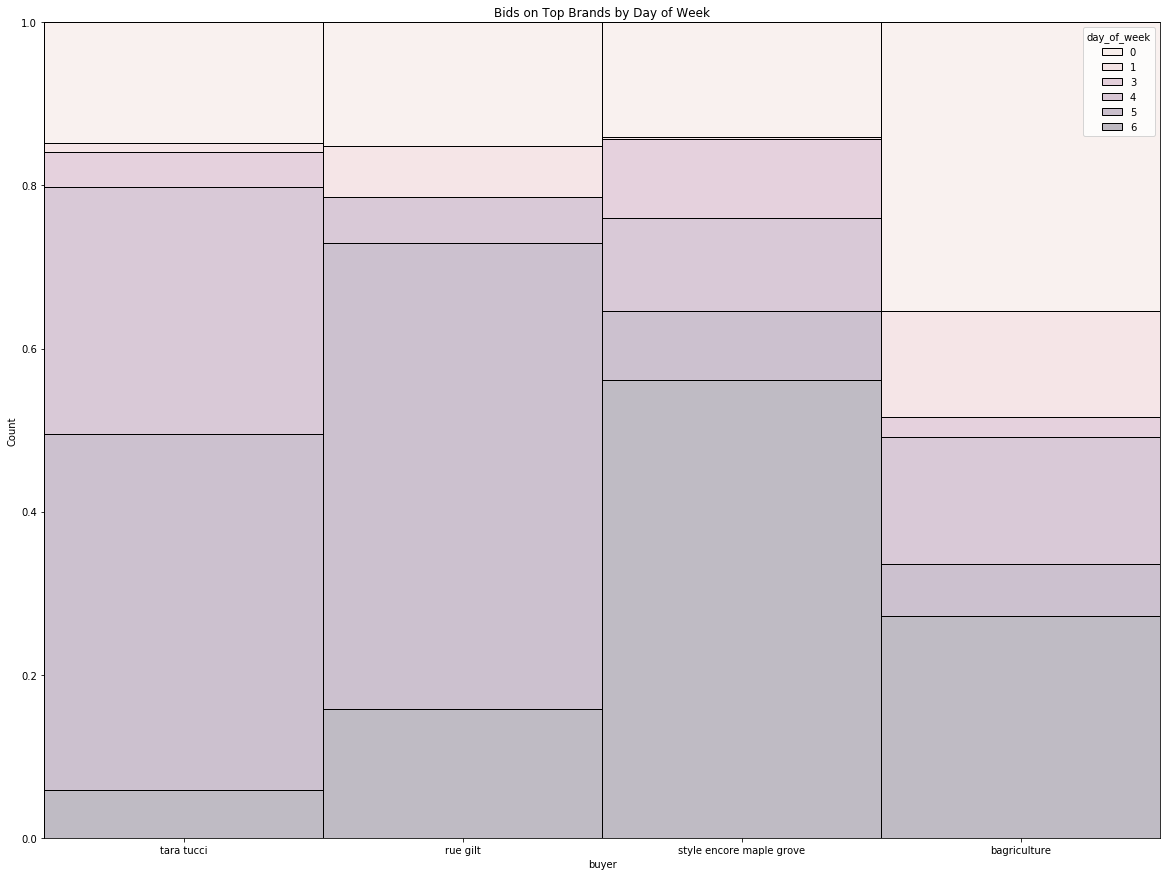

In [36]:
top_buy=['bagriculture', 'rue gilt', 'tara tucci', 'style encore maple grove']

top_bidders=top_thirty.loc[top_thirty['buyer'].isin(top_buy)]

plt.figure(figsize=(20,15))
sns.histplot(x='buyer', data=top_bidders, bins=12, hue='day_of_week', alpha=0.3, multiple='fill')
plt.title('Bids on Top Brands by Day of Week')
plt.show()

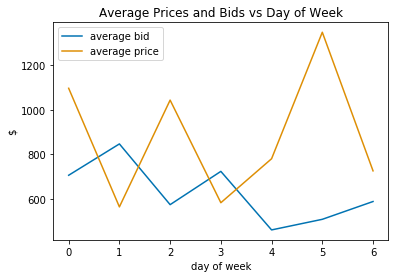

In [37]:
# Auction
bid_dow=bid_thirty.groupby('day_of_week')['bid'].mean().sort_values(ascending=False)

ax1=sns.lineplot(data=bid_dow, label='average bid')

# Stock
buy_dow=thirty.groupby('day_of_week')['price'].mean().sort_values(ascending=False)

ax2=sns.lineplot(data=buy_dow, label='average price')
plt.ylabel('$')
plt.xlabel('day of week')
plt.title('Average Prices and Bids vs Day of Week')
plt.legend()
plt.show()

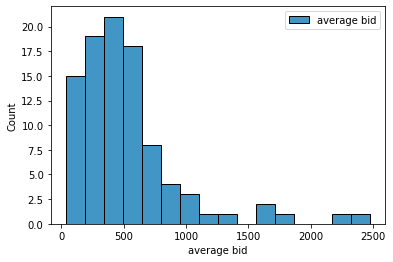

In [38]:
bid_buy=bid_thirty.groupby('buyer')['bid'].mean().sort_values(ascending=False)

ax1=sns.histplot(data=bid_buy, label='average bid')

plt.legend()
plt.xlabel('average bid')
plt.show()

#### Segmenting By Auction

In [39]:
bid_thirty.head()

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,day_of_week,hour,day,date
29780,300,182137,karen's rocks and rags,2520206,Yves Saint Laurent,Wallets,Yves Saint Laurent Folding Wallet Blue,B,127,32.60,NaN,2021-04-09 10:06:58,4,10,Friday,2021-04-09
29781,300,182137,karen's rocks and rags,2519643,Chanel,Bracelets,Chanel Other Line Accessories / Bracelets Bang...,B,159,41.92,169.0,2021-04-09 10:07:17,4,10,Friday,2021-04-09
29782,300,182137,karen's rocks and rags,2518627,Louis Vuitton,Rings,Louis Vuitton Ankhlusion Ring Pink,B,95,51.23,NaN,2021-04-09 10:07:48,4,10,Friday,2021-04-09
29783,300,182137,karen's rocks and rags,2520566,Marc Jacobs,Shoulder Bags,Marc Jacobs Snap Shot,B,157,65.21,196.0,2021-04-09 10:08:35,4,10,Friday,2021-04-09
29784,300,182137,karen's rocks and rags,2519897,Gucci,Totes,Gucci Plus Tote Bag Sherry Brown,B,187,65.21,NaN,2021-04-09 10:08:53,4,10,Friday,2021-04-09


In [40]:
auc_group=bid_thirty.groupby('auction_id')

In [41]:
auc_group['bid'].mean()

auction_id
300     326.800209
301     932.251613
302     556.237113
303     657.817974
304     319.331505
305    1154.943396
306     585.750000
307    1075.885271
308     598.841973
309     359.238532
310    1090.520249
311     266.666667
312     934.269930
313     609.981265
314     322.878951
315     904.221545
316     531.049149
Name: bid, dtype: float64

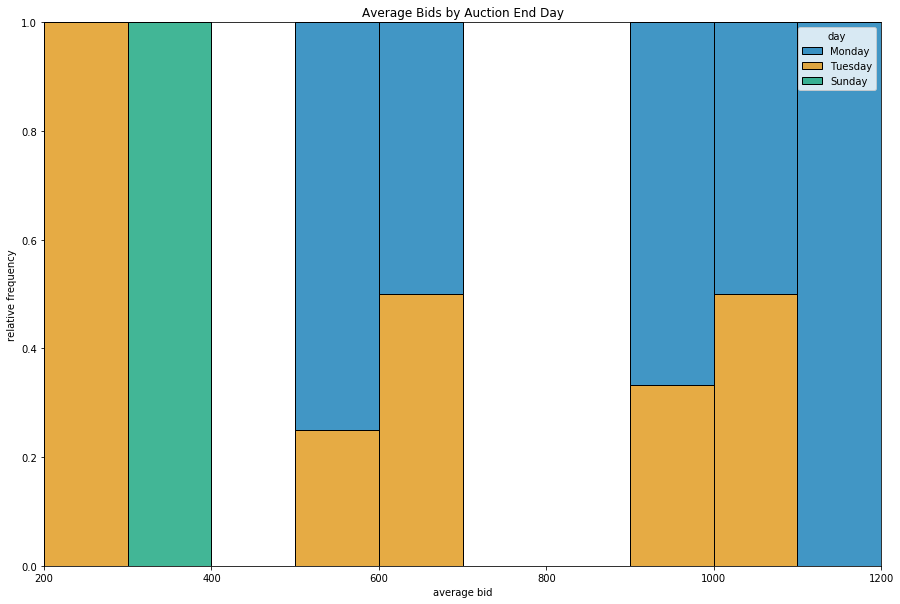

In [42]:
plt.figure(figsize=(15,10))
sns.histplot(x=auc_group['bid'].mean(), binwidth=100, binrange=[200,1200], 
             hue=auc_group['day'].last(),
             hue_order=['Monday', 'Tuesday', 'Sunday'], 
             stat='count', multiple='fill')
plt.title('Average Bids by Auction End Day')
plt.xlabel('average bid')
plt.ylabel('relative frequency')
plt.show()

We see that during the auctions which end on Monday (Aucnet High and EcoRing), average bids have a wide range. Will need to go in and tag which auctions they are. The auctions which end on Sunday (Aucnet Low) unsurprisingly have average bids ranging from 300-400. Auctions which end on Tuesday (Val Bags) also spread a wide range of average bids.

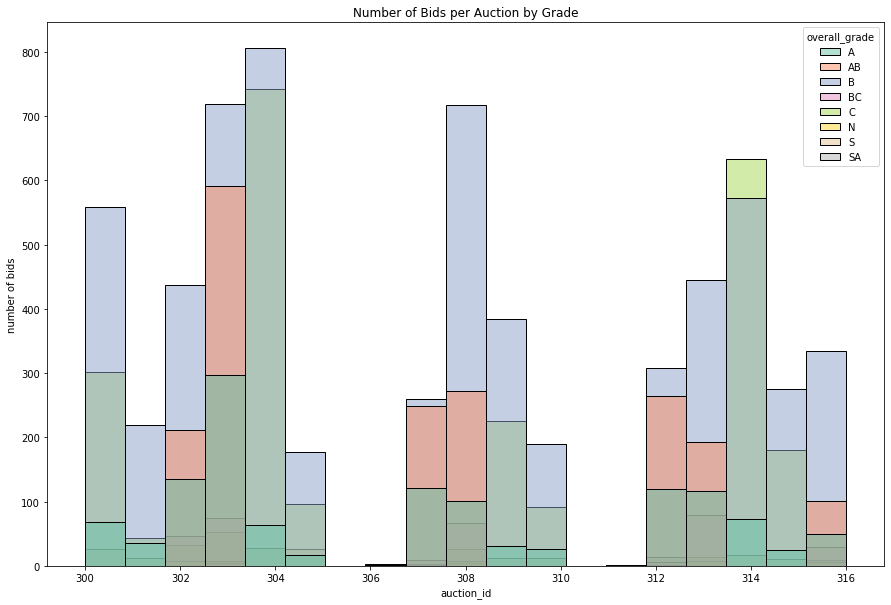

In [43]:
plt.figure(figsize=(15,10))
sns.set_palette('Set2')
sns.histplot(x='auction_id', hue='overall_grade', data=bid_thirty.sort_values(by='overall_grade'))
plt.title('Number of Bids per Auction by Grade')
plt.ylabel('number of bids')
plt.show()

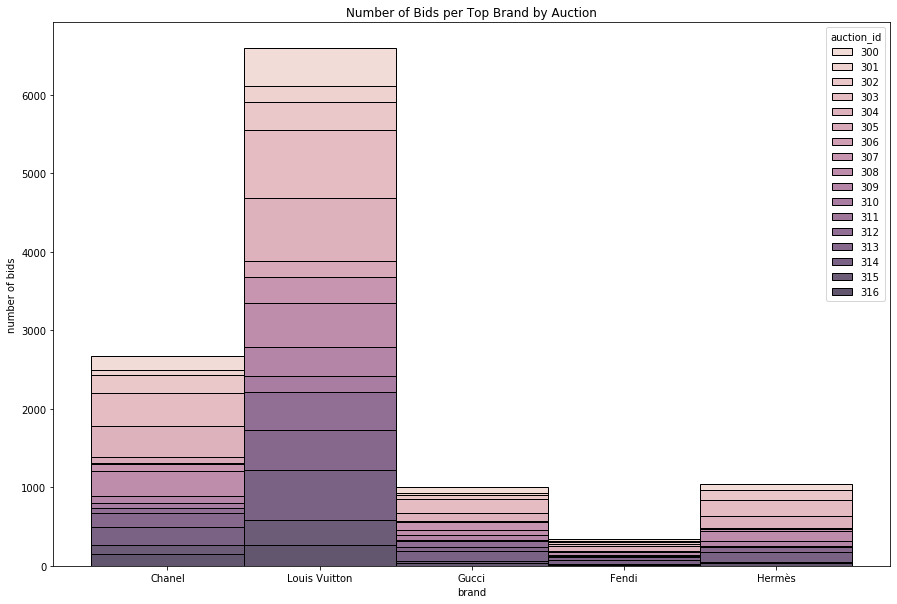

In [44]:
plt.figure(figsize=(15,10))
sns.histplot(x='brand_name', 
             hue='auction_id', data=top_thirty,
             stat='count', multiple='stack')
plt.title('Number of Bids per Top Brand by Auction')
plt.xlabel('brand')
plt.ylabel('number of bids')
plt.show()

This chart shows the number of bids on each designer per auction. I will now go through and categorize the auctions by their name. We see an overall favoring of LV.

## 30 Days

In [45]:
def sort_auction(df):
    """
    Returns a dict. Sorts auctions into one of four categories: Aucnet High, Aucnet Low, 
    Val Bags & Jewelry, and EcoRing.
    
    Parameter df: the DataFrame to search
    Precondition: df is a pandas DataFrame
    """
    dict={}
    
    grp=df.groupby('auction_id')
    day_df=pd.DataFrame(grp['day'].last())
    time_df=pd.DataFrame(grp['hour'].first())
    
    for i in grp.groups:
        end_day=day_df.loc[day_df.index==i]['day'][i]
        
        if end_day is 'Sunday':
            dict[i]='Aucnet Low'
        elif end_day is 'Monday':
            start_hour=time_df.loc[time_df.index==i]['hour'][i]
            if grp['bid'].mean()[i]<700:
                dict[i]='EcoRing'
            else:
                dict[i]='Aucnet High'
                
        elif end_day is 'Tuesday':
            dict[i]='Val Bags & Jewelry'          
            
    return dict
aucs=sort_auction(bid_thirty)

In [46]:
auc_key=pd.DataFrame.from_dict(aucs, orient='index')

In [47]:
bid_thirty=pd.merge(bid_thirty, auc_key, left_on='auction_id', right_index=True)
bid_thirty=bid_thirty.rename(columns={0:'auction_name'})
bid_thirty.loc[bid_thirty['auction_id']==313]['auction_name']='EcoRing'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
new_top_thirty=bid_thirty.loc[bid_thirty['brand_name'].isin(top)]

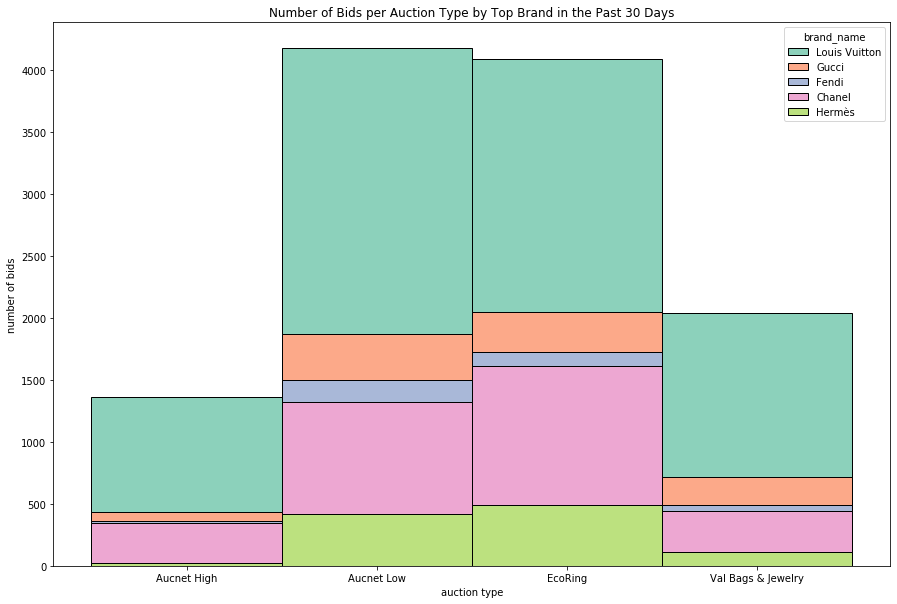

In [49]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='brand_name', data=new_top_thirty.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'])
plt.title('Number of Bids per Auction Type by Top Brand in the Past 30 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

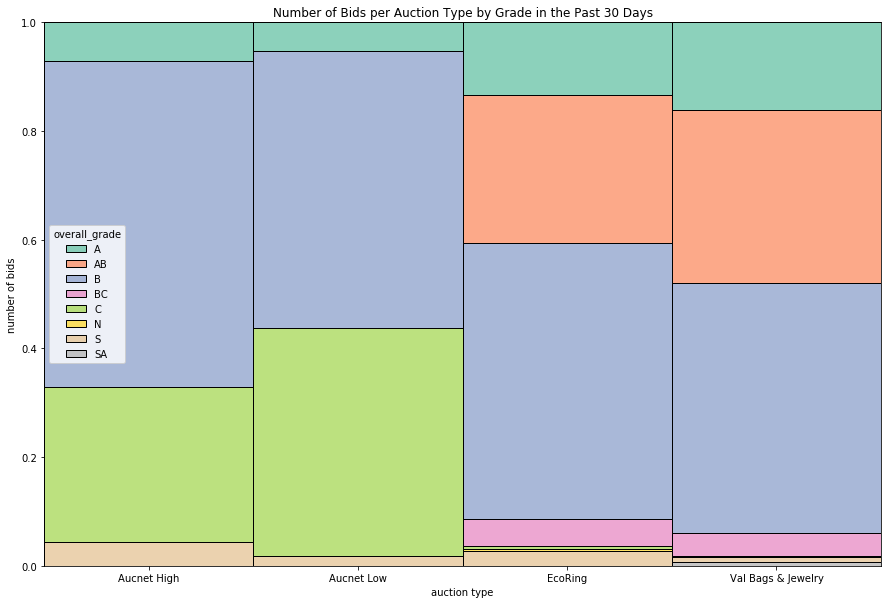

In [50]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_thirty.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill')
plt.title('Number of Bids per Auction Type by Grade in the Past 30 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

## 60 days

In [51]:
sixty_aucs=sort_auction(bid_sixty)
sixty_auc_key=pd.DataFrame.from_dict(sixty_aucs, orient='index')

In [52]:
bid_sixty=pd.merge(bid_sixty, sixty_auc_key, left_on='auction_id', right_index=True)
bid_sixty=bid_sixty.rename(columns={0:'auction_name'})

In [53]:
top_sixty=bid_sixty.loc[bid_sixty['brand_name'].isin(top)]

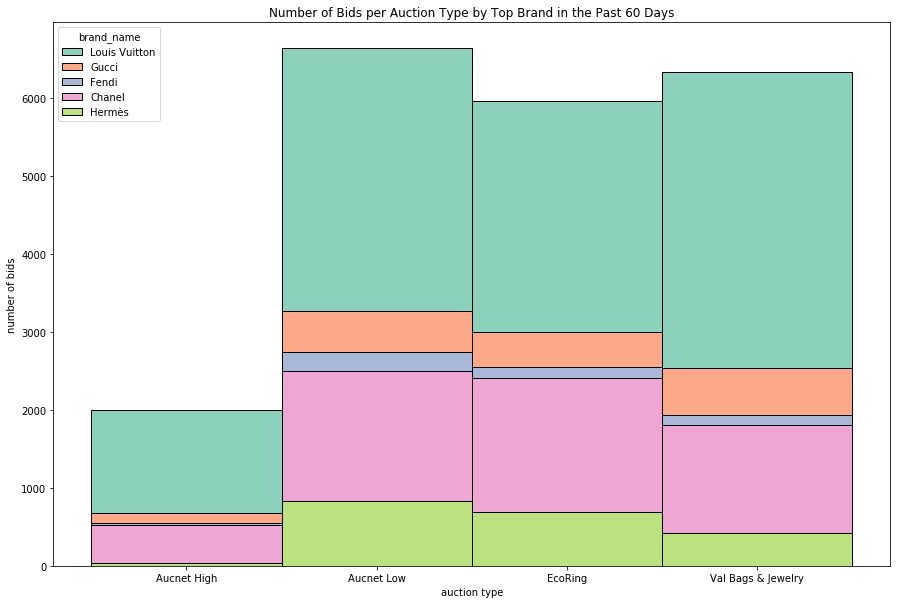

In [54]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='brand_name', data=top_sixty.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'])
plt.title('Number of Bids per Auction Type by Top Brand in the Past 60 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

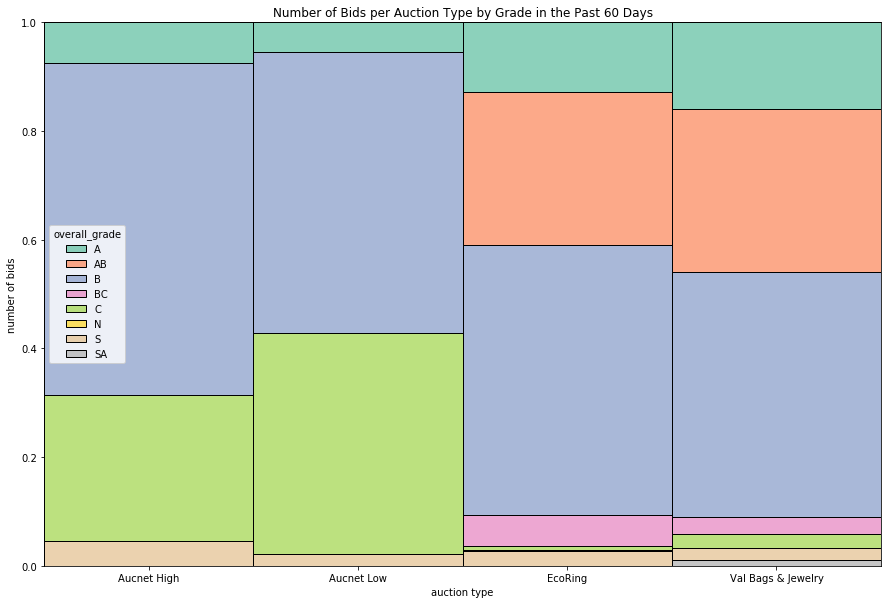

In [55]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_sixty.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill')
plt.title('Number of Bids per Auction Type by Grade in the Past 60 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

## 90 Days

In [56]:
ninety_aucs=sort_auction(bid_ninety)
ninety_auc_key=pd.DataFrame.from_dict(ninety_aucs, orient='index')

In [57]:
bid_ninety=pd.merge(bid_ninety, ninety_auc_key, left_on='auction_id', right_index=True)
bid_ninety=bid_ninety.rename(columns={0:'auction_name'})

In [58]:
top_ninety=bid_ninety.loc[bid_ninety['brand_name'].isin(top)]

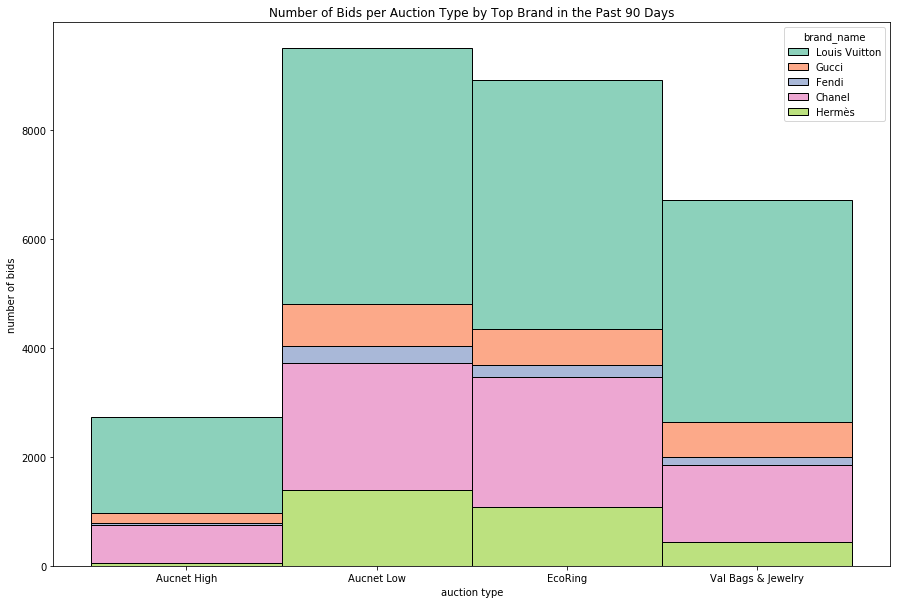

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='brand_name', data=top_ninety.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'])
plt.title('Number of Bids per Auction Type by Top Brand in the Past 90 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

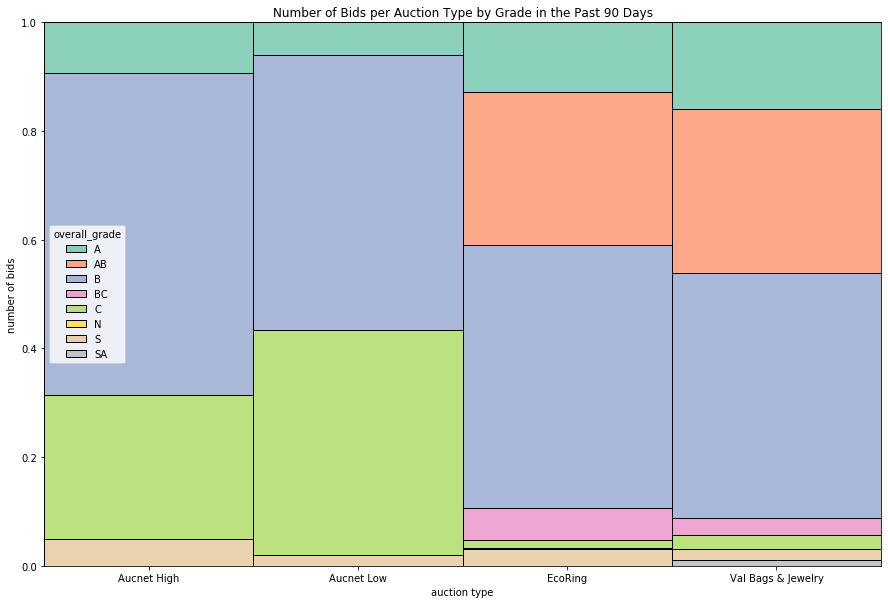

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_ninety.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill')
plt.title('Number of Bids per Auction Type by Grade in the Past 90 Days')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

## YTD

In [61]:
ytd_aucs=sort_auction(bid)
ytd_auc_key=pd.DataFrame.from_dict(ytd_aucs, orient='index')

In [62]:
bid=pd.merge(bid, ytd_auc_key, left_on='auction_id', right_index=True)
bid=bid.rename(columns={0:'auction_name'})

In [63]:
top_bid=bid.loc[bid['brand_name'].isin(top)]

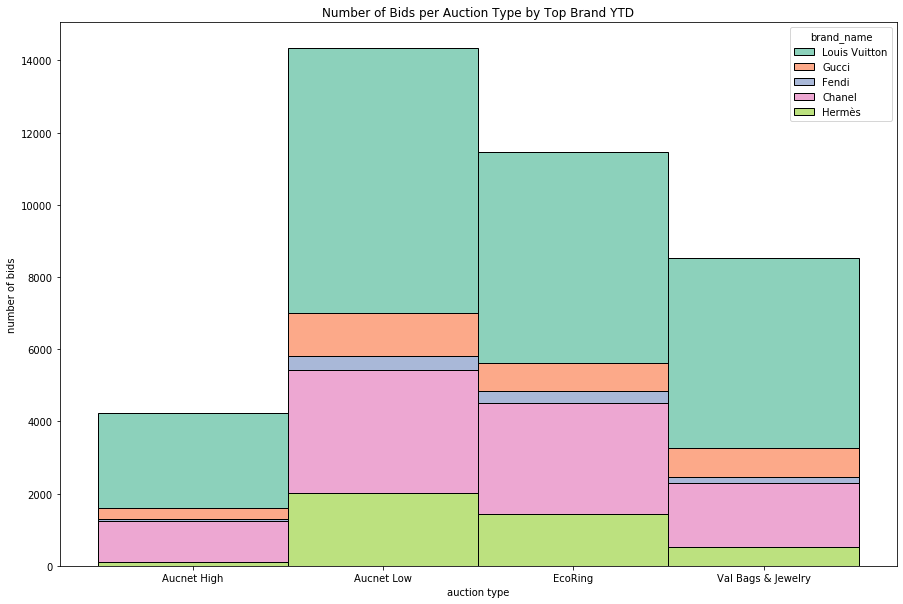

In [64]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='brand_name', data=top_bid.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'])
plt.title('Number of Bids per Auction Type by Top Brand YTD')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

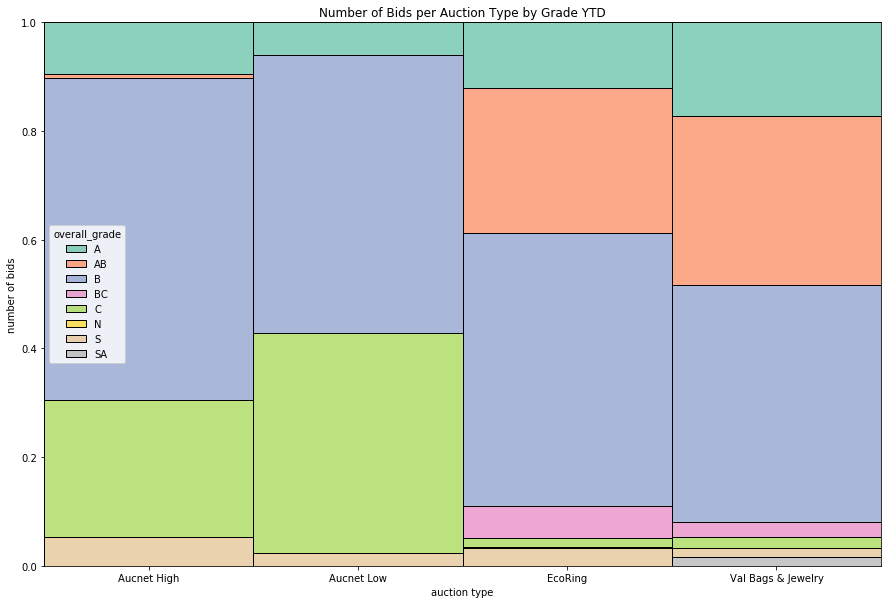

In [65]:
plt.figure(figsize=(15,10))
sns.histplot(x='auction_name',
             hue='overall_grade', data=bid.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill')
plt.title('Number of Bids per Auction Type by Grade YTD')
plt.xlabel('auction type')
plt.ylabel('number of bids')
plt.show()

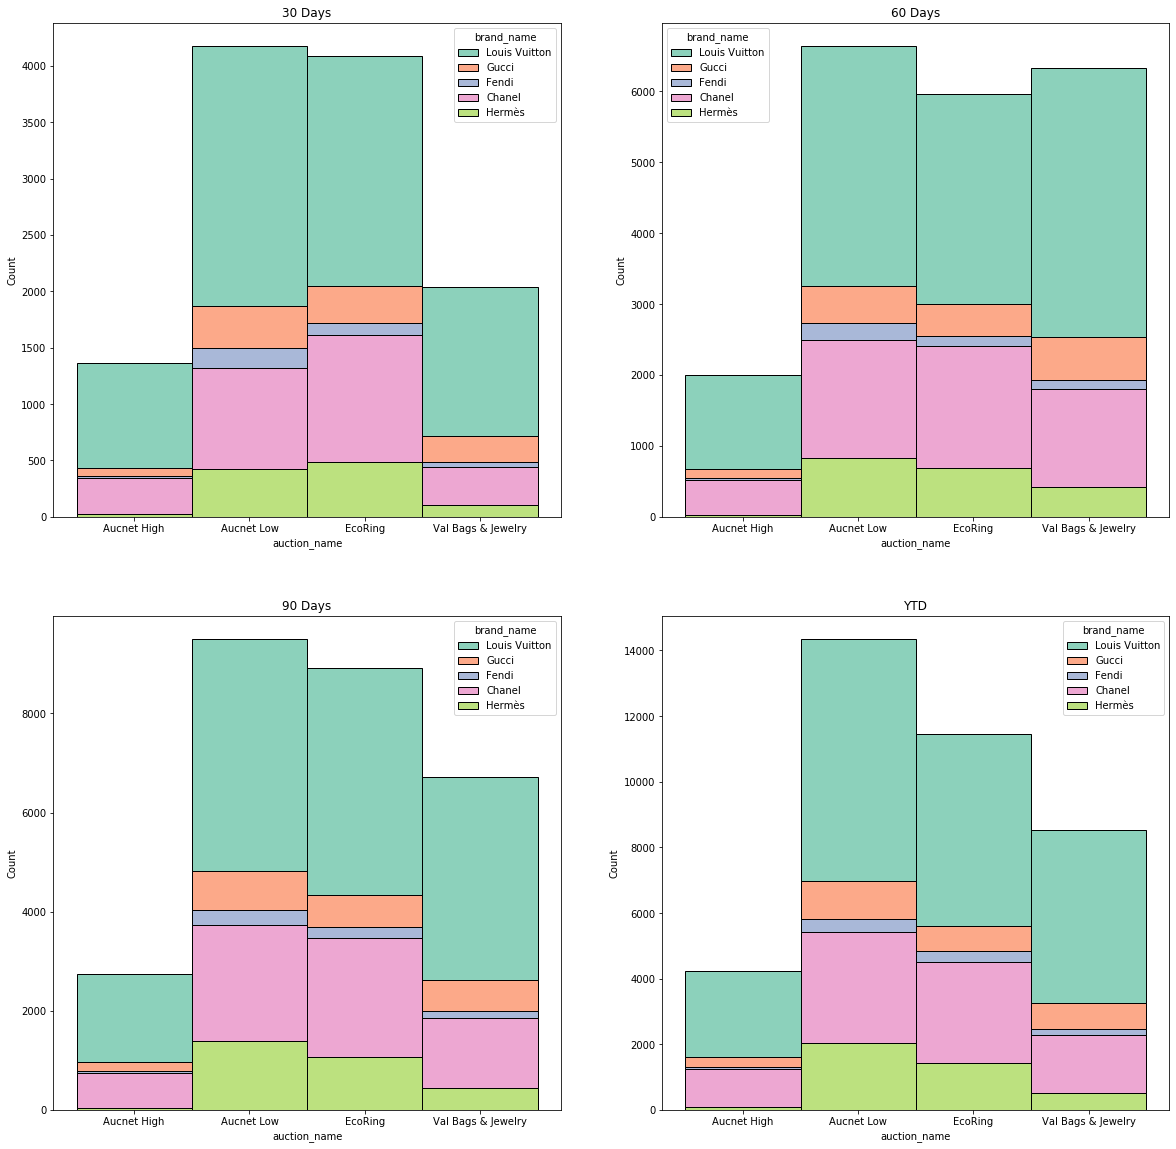

In [66]:
fig,axes=plt.subplots(2, 2, figsize=(20,20))

ax1=sns.histplot(x='auction_name',
             hue='brand_name', data=new_top_thirty.sort_values(by='auction_name'),
             stat='count', multiple='stack', 
             hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'], 
            ax=axes[0,0], label='30 Days').set(title='30 Days')

ax2=sns.histplot(x='auction_name',
             hue='brand_name', data=top_sixty.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'],
            ax=axes[0,1], label='60 Days').set(title='60 Days')

ax3=sns.histplot(x='auction_name',
             hue='brand_name', data=top_ninety.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'],
            ax=axes[1,0], label='90 Days').set(title='90 Days')

ax4=sns.histplot(x='auction_name',
             hue='brand_name', data=top_bid.sort_values(by='auction_name'),
             stat='count', multiple='stack',
            hue_order=['Louis Vuitton', 'Gucci', 'Fendi', 'Chanel', 'Hermès'],
            ax=axes[1,1], label='YTD').set(title='YTD')

plt.show()

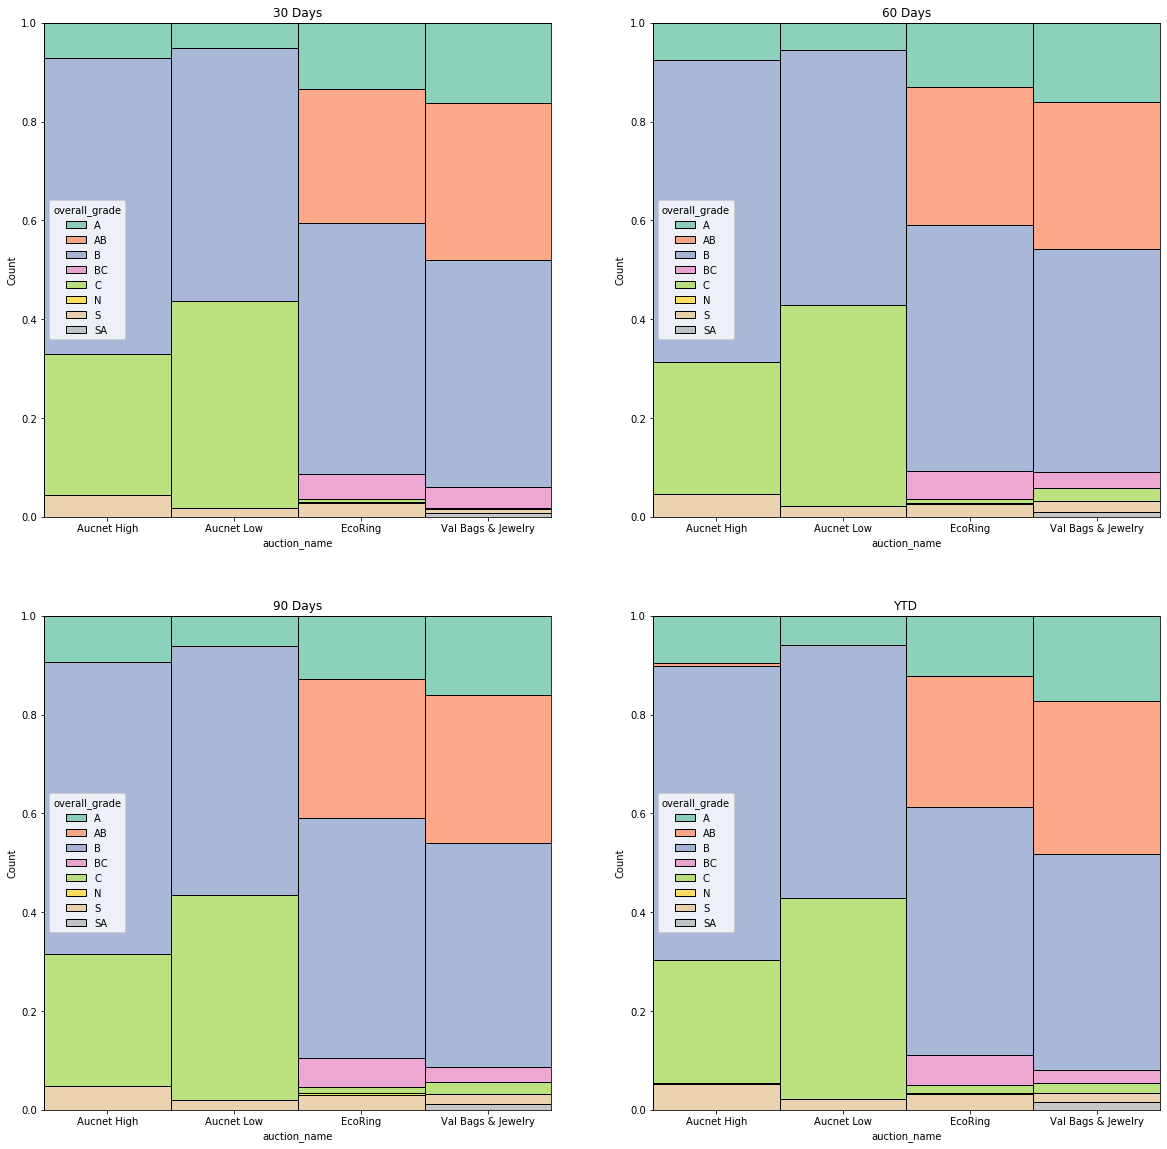

In [67]:
fig,axes=plt.subplots(2, 2, figsize=(20,20))

sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_thirty.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill', ax=axes[0,0]).set(title='30 Days')

sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_sixty.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill', ax=axes[0,1]).set(title='60 Days')

sns.histplot(x='auction_name',
             hue='overall_grade', data=bid_ninety.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill', ax=axes[1,0]).set(title='90 Days')

sns.histplot(x='auction_name',
             hue='overall_grade', data=bid.sort_values(by=['overall_grade', 'auction_name']),
             stat='count', multiple='fill', ax=axes[1,1]).set(title='YTD')

plt.show()

In [68]:
# bid_thirty.to_csv('bid_thirty.csv')